![../docs/images/banner-small.png](../docs/images/banner-small.png)

In [10]:
!pip install invertedai
from IPython.display import display, Image, clear_output
import matplotlib.pyplot as plt
import imageio
import numpy as np
import cv2
import invertedai as iai
clear_output()

In [8]:
iai.add_apikey("")
location="CARLA:Town03:Roundabout"
simulation_length = 10

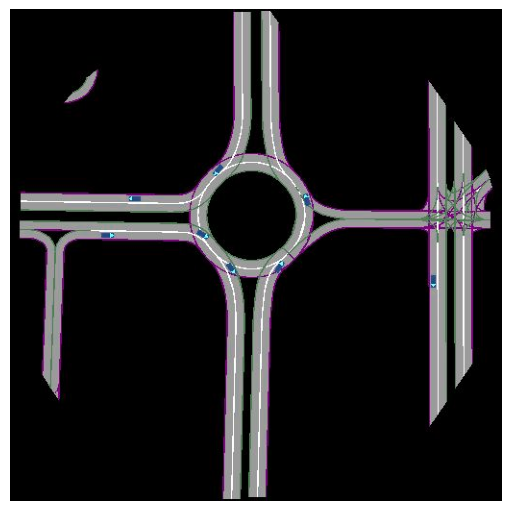

In [9]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(5, 5))
ax.set_axis_off()
response = iai.initialize(
    location=location,
    agent_count=10,
    batch_size=1,
    min_speed=10,
    max_speed=20,
)
agent_attributes = response["attributes"]
frames = []
for t in range(simulation_length):
    response = iai.drive(
        agent_attributes=agent_attributes,
        states=response["states"],
        recurrent_states=response["recurrent_states"],
        get_birdviews=True,
        location=location,
        obs_length=1,
        step_times=1,
    )
    frames.append(cv2.imdecode(np.array(response["bird_view"], dtype=np.uint8), cv2.IMREAD_COLOR))
    ax.imshow(frames[-1])
    display(plt.gcf())
    clear_output(wait=True)    

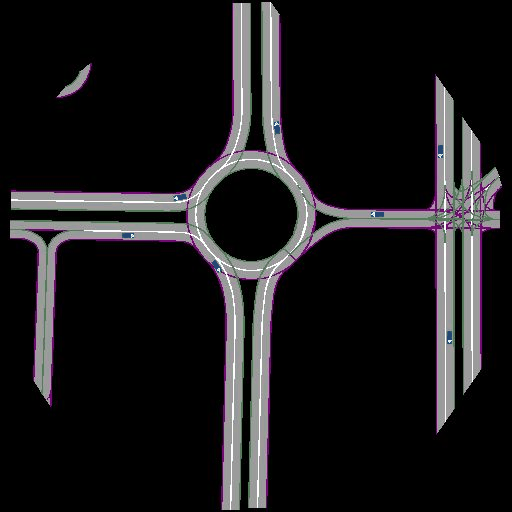

In [7]:
imageio.mimsave("iai-drive.gif", np.array(frames), format="GIF-PIL")
Image(open('iai-drive.gif','rb').read())